# MDI 720
## DM n°1


In [1]:
# Bonjour, je commence ce DM, par telecharger les librairies nécessaires à la résolution de ce TP 
from os import path
import sys 
import os
import path
import pandas as pd
import urllib
import zipfile
import numpy as np
import matplotlib.pyplot as plt  # for plots
import math as m
import fractions as fra

from matplotlib import rc
import seaborn as sns
from os import mkdir, path
from scipy import stats
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, pi, sqrt
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.linalg import toeplitz
from numpy.linalg import eigh


#Attention, ne pas oublier d'activer la fonction de visualisation via les outils Matplot

%matplotlib inline


## Je suis très scolaire, donc je commence cet exercice par un bon petit copier coller de l'ennoncé

url=u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename='household_power_consumption'
zipfilename=filename+'.zip'
Location = url + zipfilename

#testing existence of file:

if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
    else:
        if not(path.isfile('zipfilename')):
            urllib.urlretrieve(Location, zipfilename)
#unzip part

zip = zipfile.ZipFile(zipfilename)
zip.extractall()

na_values=['?','']
fields=['Date','Time','Global_active_power']
df=pd.read_csv(filename+'.txt',sep=';',nrows=200000,na_values=na_values, usecols=fields)
df1=pd.read_csv(filename+'.txt',sep=';',nrows=200000,na_values=na_values, usecols=fields)
#print(df)

Voici nos appels de puissance en ordonnée et des minutes en abscisses
Pour information 200 000 unités <=> 140 jours


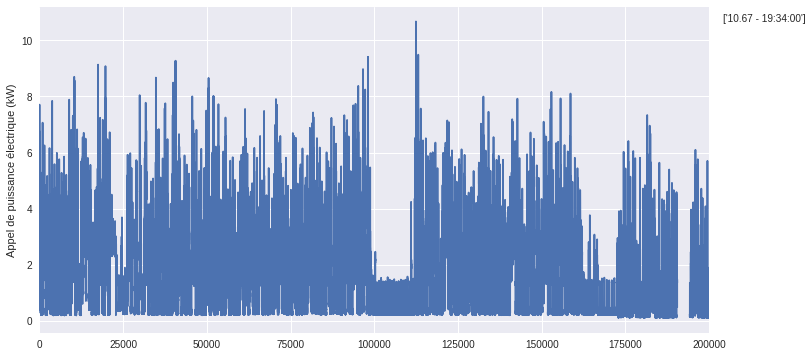

In [2]:
# Avant de commencer comme un bourrain, je vais jeter un coup d'oeuil au contenu de ce fichier
fig = plt.figure(1, figsize=(12, 6))
df.dtypes
df['Global_active_power'].min()
df['Global_active_power'].plot()
MaxValue = df['Global_active_power'].max()

# Name associated with the maximum value
MaxName = df['Time'][df['Global_active_power'] == df['Global_active_power'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(14, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("Voici nos appels de puissance en ordonnée et des minutes en abscisses")
print("Pour information 200 000 unités <=> 140 jours")
plt.ylabel('Appel de puissance électrique (kW)')

1) En utilisant l'attribut info associé à notre data frame, nous trouvons quelques informations interessantes dont le nombre de cellules vides (cf ci dessous).
Selon le retour de cette appel, il y aurait donc 200 000 - 196 268 =  3 732 cellules vides (environ 62 h) dans notre colonne Appel de puissance électrique.
Il s'agit peut être d'un perte de communication avec le compteur électrique.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
Date                   200000 non-null object
Time                   200000 non-null object
Global_active_power    196268 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


2) Pour supprimer les lignes avec des valeurs manquantes, nous pouvons utiliser drop Nan qui efface les lignes ou colonnes dont les valeurs sont inconnues/illisibles (type NaN)

In [4]:
#print(df)
df=df.dropna(how = 'any')

          
          

In [5]:
# On verifie que le nombre d'object null a disparu et l'on est content :)'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196268 entries, 0 to 199999
Data columns (total 3 columns):
Date                   196268 non-null object
Time                   196268 non-null object
Global_active_power    196268 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.0+ MB


3) Je converti la colonne Date et time en format Time series pour faciliter les futurs post traitement

In [6]:

df['Date']=pd.to_datetime(df['Date'] + ' ' + df['Time'].astype(str), format = "%d/%m/%Y %H:%M:%S")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196268 entries, 0 to 199999
Data columns (total 3 columns):
Date                   196268 non-null datetime64[ns]
Time                   196268 non-null object
Global_active_power    196268 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ MB


4) Pour afficher le graphique entre le 1er avril et le 30 avril 2007, nous classons notre DF suivant un index : Date

In [8]:
dfi = df.set_index("Date")




4)Pour tracer le graphique entre le 1er janvier 2007 et le 30 avril 2007,commençons par isoler la bonne plage de données
==> Fonction .loc 

Puis nous la traçons

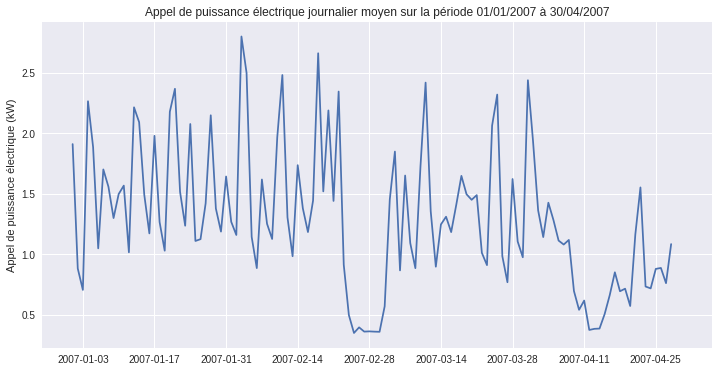

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper

dfloc=dfi.loc['20070101':'20070430']

#J'utilise la fonction groupby pour regrouper les valeurs par jours (attribut freq='d'), celles ci seront alors moyennées (cf attribut .mean)
essai=dfloc.groupby(pd.Grouper(freq='d')).mean()
fig = plt.figure(1, figsize=(12, 6))
plt.title("Appel de puissance électrique journalier moyen sur la période 01/01/2007 à 30/04/2007")
plt.plot(essai)
plt.ylabel('Appel de puissance électrique (kW)')
for tickLabel in plt.gca().get_xaxis().get_ticklabels():
    tickLabel.set_fontsize(10)

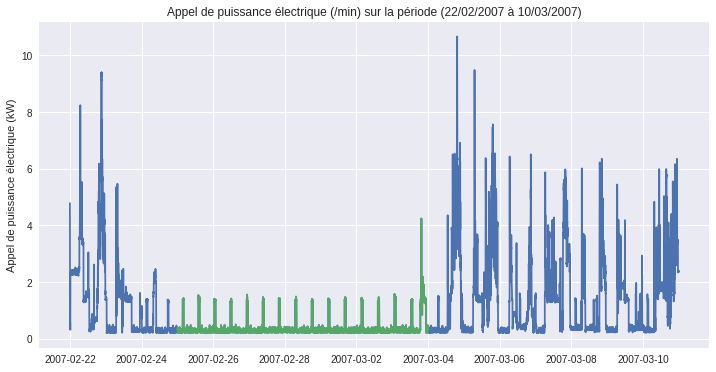

In [10]:


dflocz=dfi.loc['20070222':'20070310']

# J'efface cette colonne qui ne me sert pas
del dflocz['Time']

x = dflocz.index
fig = plt.figure(1, figsize=(12, 6))
plt.title("Appel de puissance électrique (/min) sur la période (22/02/2007 à 10/03/2007)")
plt.plot(x, dflocz['Global_active_power'])

dflocz=dfi.loc['20070225':'20070303']
x = dflocz.index

plt.plot(x, dflocz['Global_active_power'])
plt.ylabel('Appel de puissance électrique (kW)')
for tickLabel in plt.gca().get_xaxis().get_ticklabels():
    tickLabel.set_fontsize(10)

Cette chute de puissance électrique (en vert sur la courbe) peut être due à une baisse de besoin (vaccances <=> fermeture, incident sur le systeme de chauffage ou tout simplement température exterieure élevée).
Il est interressant de remarquer, sur cette periode, les appels de puissances réguliers, tous les matins, autour de 1,5 kW. Comme si le ballon d'eau chaude sanitaire etait resté sur sa programmation quotidienne :)
Le talon de consommation residuel (hors pointe) sur cette période peut être du à l'activation de certains équipements comme le refrigérateur ou autres ...

5) Prétraitement des données de température

In [11]:
# Je récupère le fichier data temp
filename='TGSTAID011249'

# Transformation du fichier en data frame
na_values = ['?',' ']
fields = ['STAID','SOUID','DATE','TG','Q_TG']
dataf = pd.read_csv(filename+'.txt', sep=',', nrows=34884)


Nettoyage du fichier et conversion de la température (/10)

In [12]:
# D'abord les éléments non interprétables
dataf=dataf.dropna(how = 'any')

# Puis, les colonnes innutiles
del dataf['STAID']
del dataf[' SOUID']
del dataf[' Q_TG']

# Normalisation de la température (bascule en °C)
dataf['   TG']=dataf['   TG']/10.


6) Creation d'une time series

In [13]:
dataf['    DATE'] = pd.to_datetime(dataf['    DATE'].astype(str), format = "%Y/%m/%d")
# je verifie l'opération
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34883 entries, 0 to 34882
Data columns (total 2 columns):
    DATE    34883 non-null datetime64[ns]
   TG       34883 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 817.6 KB


In [14]:
# Je determine le nouvel index par la colonne date
datafi = dataf.set_index('    DATE')

# Je zoom sur la plage calendaire demandée
datatemp=datafi['01/01/2007':'04/30/2007']

Tracer les courbes d'appel de puissance éléctrique et les températures éxtérieures en parallele

In [15]:
# Je joins la colonne des appels de puissance avec celle des températures

result = pd.concat([dfloc, datatemp], axis=1)

# Nettoyage des valeurs illisibles
result=result.dropna(how = 'any')


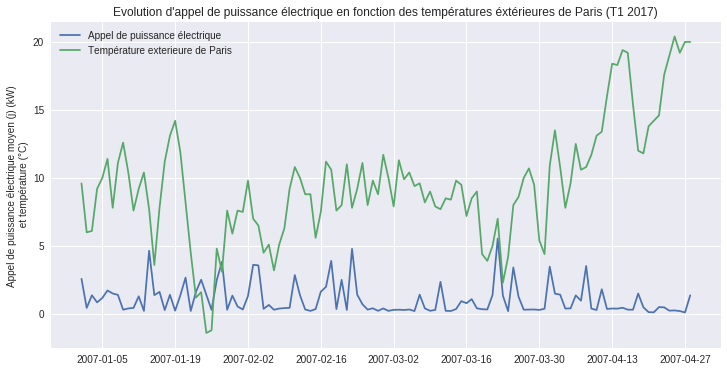

In [16]:
# Preparation du tracé

x = result.index
fig = plt.figure(1, figsize=(12, 6))
plt.plot(x, result['Global_active_power'], label="Appel de puissance électrique")
plt.plot(x, result['   TG'], label="Température exterieure de Paris")
plt.legend()

for tickLabel in plt.gca().get_xaxis().get_ticklabels():
    tickLabel.set_fontsize(10)
plt.ylabel('Appel de puissance électrique moyen (j) (kW) \n et température (°C)',fontsize=10)
plt.title("Evolution d'appel de puissance électrique en fonction des températures éxtérieures de Paris (T1 2017)")
plt.show()


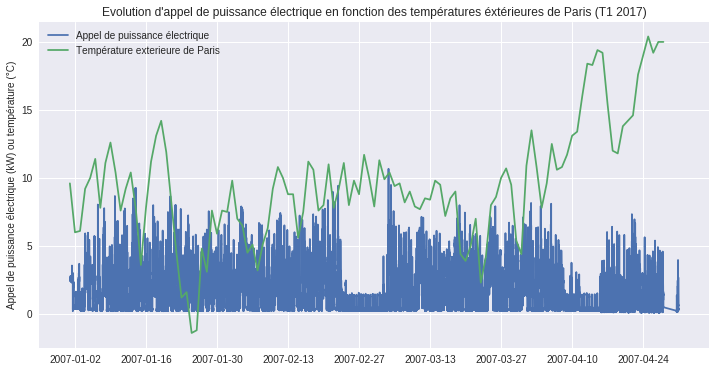

In [17]:
# Version améliorée : En reprenant le data frame initiale de l'appel de puissance éléctrique, je retrouve un niveau de détail plus important )

x0=dfloc.index
x = result.index

fig = plt.figure(1, figsize=(12, 6))
plt.plot(x0, dfloc['Global_active_power'], label="Appel de puissance électrique")
plt.plot(x, result['   TG'], label="Température exterieure de Paris")
plt.ylabel('Appel de puissance électrique (kW) ou température (°C)',fontsize=10)
plt.legend()


plt.title("Evolution d'appel de puissance électrique en fonction des températures éxtérieures de Paris (T1 2017)")
plt.show()

7)Proposer une visualisation de la pollution moyenne par année (pour l'ozone)

In [18]:
## Je suis très scolaire, donc je commence cet exercice par un bon petit copier coller de l'ennoncé


filename='airparifabae1bd78def4fe8a409ab8c95fc4608'
zipfilename=filename+'.zip'
Location = zipfilename

#unzip part

zip = zipfile.ZipFile(zipfilename)
zip.extractall()

file="20080421_20160927-PA13_auto"
na_values=['?','',"n/d"]
fields=['date','heure','NO2','O3']
data1=pd.read_csv(file+'.csv',sep=';',nrows=200000,na_values=na_values, usecols=fields)

# Nettoyage
data1=data1.dropna(how = 'any')



# declaration des format des colonnes du fichier 
data1['heure'].type=float
data1['O3'].type=int
data1['NO2'].type=int
data1['heure']=data1['heure'] - 1.0

# Preparation de l'index par l'initialisation d'une colonne Time plus affinnée date et time
data1['date']=pd.to_datetime(data1['date'] + ' ' + data1['heure'].astype(str), format = "%d/%m/%Y %H.%f")
data1i = data1.set_index('date')


del data1i['heure']


data1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 69465 entries, 1 to 73920
Data columns (total 4 columns):
date     69465 non-null datetime64[ns]
heure    69465 non-null float64
NO2      69465 non-null object
O3       69465 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.1+ MB


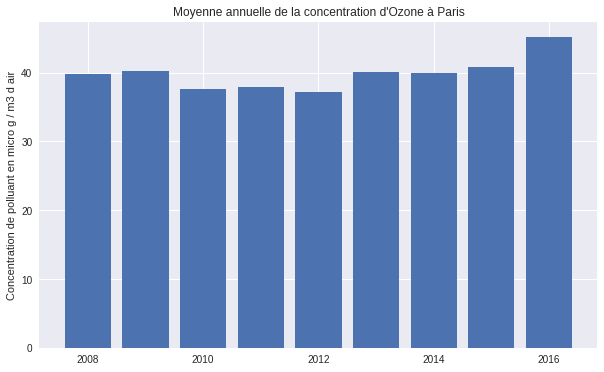

In [19]:
from array import array

data1i['O3']=data1i['O3'].astype(float)
data1i['NO2']=data1i['NO2'].astype(float)

# Preparation d'un listeconsolidant toutes les moyennes annuelles
liste=[2008,2009,2010,2011,2012,2013,2014,2015,2016]
l=[]

for an in liste:
    datayear=data1i['{0}'.format(an)]
    a=datayear.mean()
    a=a['O3']
    l.append(a)

fig = plt.figure(1, figsize=(10, 6))
plt.title("Moyenne annuelle de la concentration d'Ozone à Paris")
plt.bar(liste,l)
plt.ylabel('Concentration de polluant en micro g / m3 d air')

8) Proposer une visualisation de la pollution la plus critique par année pour l'ozone et pour pour le dioxyde d'azote

/home/david/anaconda2/envs/py3k/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


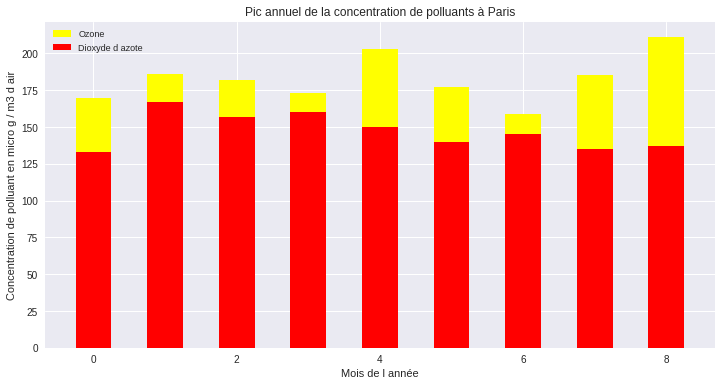

In [20]:
MaximumO3=[]
MaximumNO2=[]

# Preparation d'un liste consolidant tous les maximums annuels

for an in liste:
    datayear=data1i['{0}'.format(an)]
    m=datayear.max()
    mO3=m['O3']
    MaximumO3.append(mO3)
    
    mNO2=m['NO2']
    MaximumNO2.append(mNO2)



    
fig = plt.figure(1, figsize=(12, 6))
plt.title("Pic annuel de la concentration de polluants à Paris")

plt.legend()


x = liste
N = len(x)
y=MaximumO3
x = range(N)
widthO = 1/2.
widthNO2=1/2.

plt.bar(x, y, widthO, color="yellow",label='Ozone')
y=y=MaximumNO2
plt.bar(x, y, widthNO2, color="red",label='Dioxyde d azote')
plt.ylabel('Concentration de polluant en micro g / m3 d air')
plt.xlabel('Mois de l année')
plt.legend(prop={'size':9})

9) ) Proposer une représentation par mois de la pollution à l'ozone et au dioxyde d'azote. 

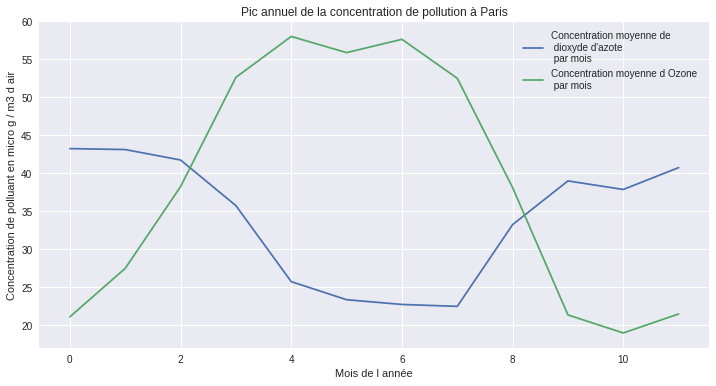

In [21]:
# Preparation d'un matrice consolidant toutes les moyennes mensuel du jeu de données

MensuelleO3=np.zeros((12, 9), dtype='i')
MoyennemensuelleO3=[]
TopO3=()
topO3=0

MensuelleNO2=np.zeros((12, 9), dtype='i')
MoyennemensuelleNO2=[]
TopNO2=()
topNO2=0

month=[4,5,6,7,8,9,10,11,12]
year=[2008,2009,2010,2011,2012,2013,2014,2015,2016]
elem=0
for elem in month:
    datayear=data1i['2008-{0}'.format(elem)]
    m=datayear.mean()
    mO3=m['O3']
    MoyennemensuelleO3.append(mO3)
    
    mNO2=m['NO2']
    MoyennemensuelleNO2.append(mNO2)
    
    

MensuelleO3[3:,0]=MoyennemensuelleO3
topO3=max(MoyennemensuelleO3)
TopO3=TopO3+((MoyennemensuelleO3.index(topO3)+4,topO3)) # Correction d'une unité du aux indexes demarrant de 0 et sur l'année 2008 d'avril"
#plt.plot(month,MoyennemensuelleO3,label="Concentration d'Ozone 2008")

MensuelleNO2[3:,0]=MoyennemensuelleNO2
topNO2=max(MoyennemensuelleNO2)
TopNO2=TopNO2+((MoyennemensuelleNO2.index(topNO2)+4,topNO2)) # Correction d'une unité du aux indexes demarrant de 0 et sur l'année 2008 d'avril"
#plt.plot(month,MoyennemensuelleNO2,label="Concentration de dioxyde d'azote 2008")



months=[1,2,3,4,5,6,7,8,9,10,11,12] 
elem=0
year1=[2009,2010,2011,2012,2013,2014,2015]
i=0
an=0
for an in year1 :
    MoyennemensuelleO3=[]
    MoyennemensuelleNO2=[]
    for elem in months:
        datayear=data1i["{0}-{1}".format(an, elem)]
        m=datayear.mean()
        mO3=m['O3']
        MoyennemensuelleO3.append(mO3)
    
        mNO2=m['NO2']
        MoyennemensuelleNO2.append(mNO2)
    
    i=i+1
    MensuelleNO2[:,i]=MoyennemensuelleNO2
    topNO2=max(MoyennemensuelleNO2)
    TopNO2=TopNO2+((MoyennemensuelleNO2.index(topNO2)+1,topNO2))
    # Correction d'une unité du aux indexes demarrant de 0

    MensuelleO3[:,i]=MoyennemensuelleO3
    topO3=max(MoyennemensuelleO3)
    TopO3=TopO3+((MoyennemensuelleO3.index(topO3)+1,topO3))
    # Correction d'une unité du aux indexes demarrant de 0
   


MoyennemensuelleO3=[]
MoyennemensuelleNO2=[]
months=[1,2,3,4,5,6,7,8,9] 
elem=0
for elem in months:
    datayear=data1i['2016-{0}'.format(elem)]
    m=datayear.mean()
    mO3=m['O3']
    MoyennemensuelleO3.append(mO3)
    
    mNO2=m['NO2']
    MoyennemensuelleNO2.append(mNO2)
    
MensuelleNO2[:9,8]=MoyennemensuelleNO2
topNO2=max(MoyennemensuelleNO2)
TopNO2=TopNO2+((MoyennemensuelleNO2.index(topNO2)+1,topNO2))# Correction d'une unité du aux indexes demarrant de 0
#plt.plot(months,MoyennemensuelleNO2,label="Concentration d'Ozone 2016")

MensuelleO3[:9,8]=MoyennemensuelleO3
topO3=max(MoyennemensuelleO3)
TopO3=TopO3+((MoyennemensuelleO3.index(topO3)+1,topO3))# Correction d'une unité du aux indexes demarrant de 0
#plt.plot(months,MoyennemensuelleO3,label="Concentration de dioxyde d'azote 2016")




NO2=[]
O3=[]

# Pour reduire les ecarts sur les moyennes mensuelles, je remplace les valeurs nulles des mois
# de janvier,fevrier et mars de 2008 ainsi que les mois d'octobre, novembre et décembre de 2016 
# par des valeurs moyennes de ces mois (2009 à 2016) et (2008 à 2015) respectivement

# Substitution des valeurs absentes : janvier,fevrier et mars de 2008
MensuelleNO2[0,0]=np.mean(MensuelleNO2[0,1:])
MensuelleO3[0,0]=np.mean(MensuelleO3[0,1:])
MensuelleNO2[1,0]=np.mean(MensuelleNO2[1,1:])
MensuelleO3[1,0]=np.mean(MensuelleO3[1,1:])
MensuelleNO2[2,0]=np.mean(MensuelleNO2[2,1:])
MensuelleO3[2,0]=np.mean(MensuelleO3[2,1:])

# Substitution des valeurs absentes : d'octobre, novembre et décembre 2016
MensuelleNO2[9,8]=np.mean(MensuelleNO2[9,:8])
MensuelleO3[9,8]=np.mean(MensuelleO3[9,:8])
MensuelleNO2[10,8]=np.mean(MensuelleNO2[10,:9])
MensuelleO3[10,8]=np.mean(MensuelleO3[10,:9])
MensuelleNO2[11,8]=np.mean(MensuelleNO2[11,:10])
MensuelleO3[11,8]=np.mean(MensuelleO3[11,:10])


i=0
for i in range(12):
    NO2.append(np.mean(MensuelleNO2[i,1:]))
    O3.append(np.mean(MensuelleO3[i,1:]))

  
fig = plt.figure(1, figsize=(12, 6))
plt.plot(NO2,label="Concentration moyenne de \n dioxyde d'azote \n par mois ")
plt.plot(O3,label="Concentration moyenne d Ozone \n par mois ")

plt.title("Pic annuel de la concentration de pollution à Paris")
plt.legend(prop={'size':10},loc = 'upper right')
plt.ylabel('Concentration de polluant en micro g / m3 d air')
plt.xlabel('Mois de l année')
plt.show()

Quel est le mois le plus pollué ? 

La concentration de dioxyde d'azote dans l'air est plus importante en hiver contrairement à celle de l'Ozone.
Pour établir un indicateur consolidé il faudrait determiner un poids relatif à chacune de ces concentrations (1 mg/m3 d'air d'Ozone est il équivalent à 1 mg/m3 d'air de dioxyde d'azote ?)
Ci dessous les mois les plus pollués pour chacuns de ces polluants sur la période étudiée:

In [22]:
#Faisons la moyenne de chaque ligne de mes matrices Mensuelle, consolidant les concentrations mensuelles de polluants par mois

MoyenneconsolidéeO3=np.mean(MensuelleO3,axis=1)
topO3=max(MoyenneconsolidéeO3)
#print(Moyenneconsolidée,top)
Mois=MoyenneconsolidéeO3.tolist().index(topO3)+1
print ("Selon des mesures réalisées sur Paris, de 2008 à 2016, le mois le plus pollué (en concentration d Ozone) serait le",Mois,"ème mois de l année")

MoyenneconsolidéeNO2=np.mean(MensuelleNO2,axis=1)
topNO2=max(MoyenneconsolidéeNO2)
#print(Moyenneconsolidée,top)
Mois=MoyenneconsolidéeNO2.tolist().index(topNO2)+1
print ("Selon des mesures réalisées sur Paris, de 2008 à 2016, le mois le plus pollué (en concentration de dioxyde d'azote) serait le",Mois,"ème mois de l année")


Selon des mesures réalisées sur Paris, de 2008 à 2016, le mois le plus pollué (en concentration d Ozone) serait le 5 ème mois de l année
Selon des mesures réalisées sur Paris, de 2008 à 2016, le mois le plus pollué (en concentration de dioxyde d'azote) serait le 1 ème mois de l année
